In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [126]:
df=pd.read_csv("retail.csv")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [128]:
df.shape


(99457, 10)

In [129]:
# prompt: drop rows where null value present

df.dropna(inplace=True)


In [130]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [131]:
df.dropna(inplace=True)

In [132]:
df.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [133]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [134]:
df.drop(0)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24-05-2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


In [135]:
df.tail(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15-10-2022,Mall of Istanbul


In [136]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


<Axes: xlabel='gender', ylabel='count'>

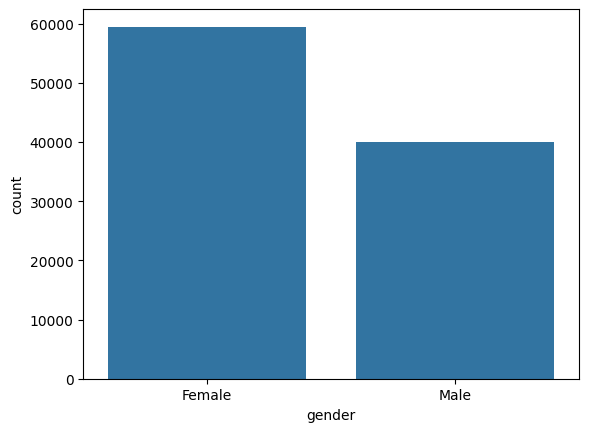

In [137]:
sns.countplot(x ='gender', data = df)

<ipython-input-138-7530c8b39ac1>:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



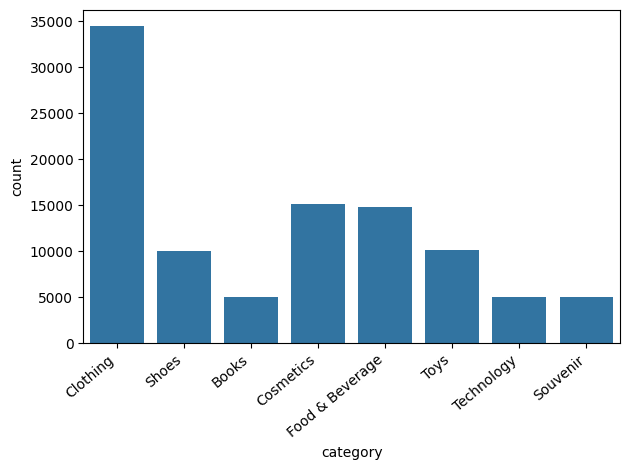

In [138]:
y=sns.countplot(x ='category', data = df)
y.set_xticklabels(y.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


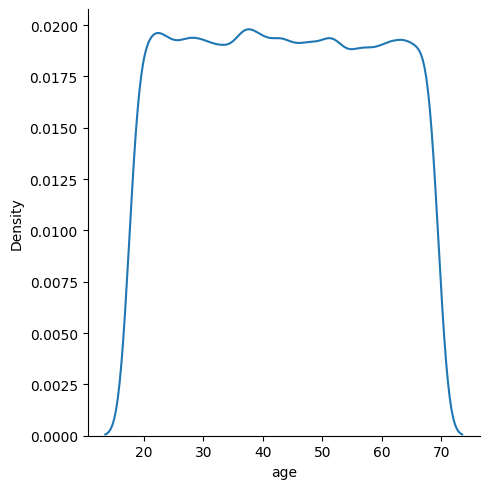

In [139]:
sns.displot(df, x="age", kind="kde")


In [140]:
date_title=df.groupby('category')['quantity'].sum().reset_index()
print(date_title)

          category  quantity
0            Books     14982
1         Clothing    103558
2        Cosmetics     45465
3  Food & Beverage     44277
4            Shoes     30217
5         Souvenir     14871
6       Technology     15021
7             Toys     30321


Text(0, 0.5, 'total quantity')

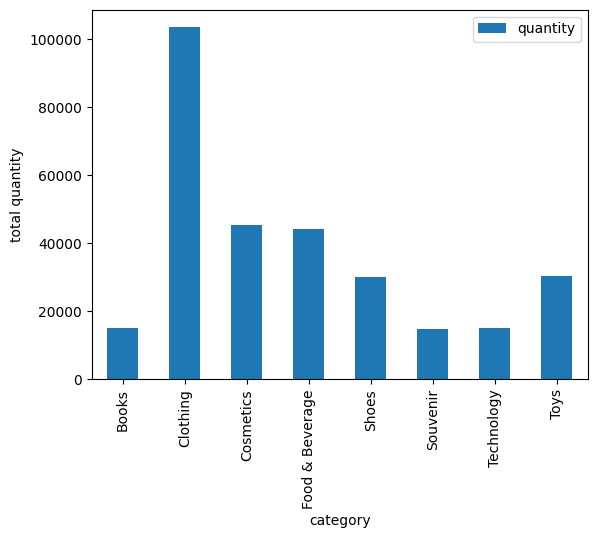

In [141]:
date_title.plot(x="category", y="quantity", kind="bar")
plt.ylabel("total quantity")

payment_method
Cash           30705030.98
Credit Card    24051476.93
Debit Card     13794858.00
Name: price, dtype: float64


<Axes: ylabel='price'>

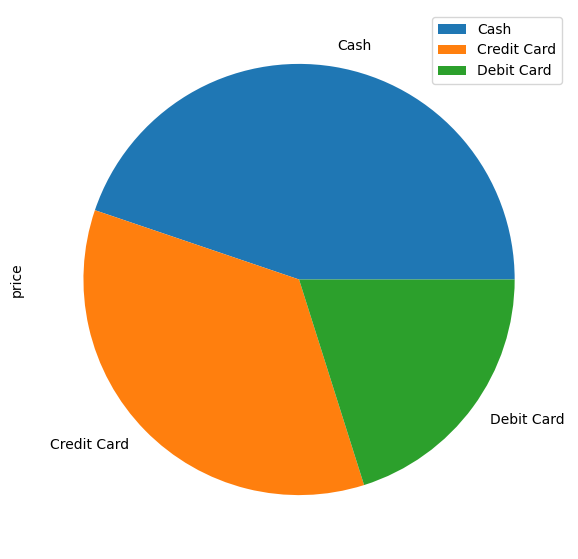

In [142]:
total_payment=df.groupby('payment_method')['price'].sum()
print(total_payment)
total_payment.plot.pie(y='price',legend='payment_method', figsize=(7, 7))


          category        price
0            Books    226977.30
1         Clothing  31075684.64
2        Cosmetics   1848606.90
3  Food & Beverage    231568.71
4            Shoes  18135336.89
5         Souvenir    174436.83
6       Technology  15772050.00
7             Toys   1086704.64


Text(0.5, 0, 'total sale')

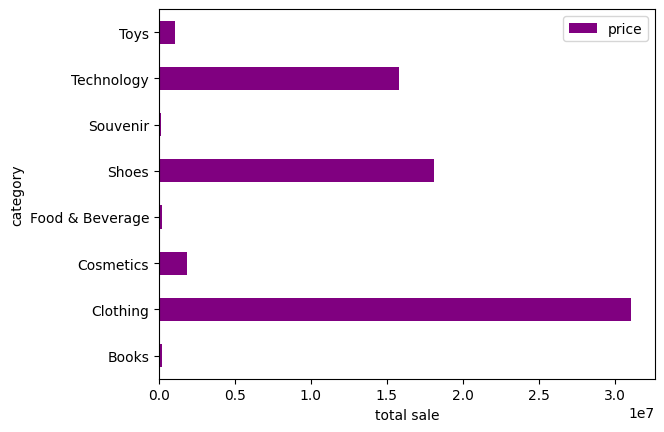

In [143]:
total_sale=df.groupby(['category'],as_index=False)['price'].sum()
print(total_sale)
total_sale.plot(x="category",y="price", kind="barh",color='purple')
plt.xlabel("total sale")

<Axes: xlabel='category'>

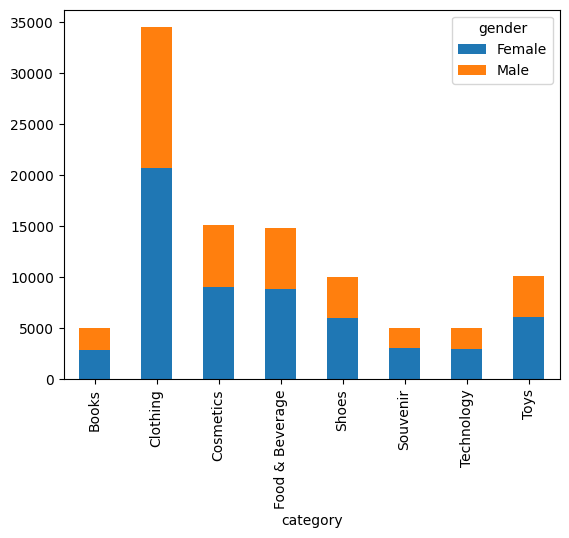

In [144]:
df.groupby(['category', 'gender']).size().unstack().plot(kind='bar', stacked=True)

<ipython-input-145-3fd5d53943ac>:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



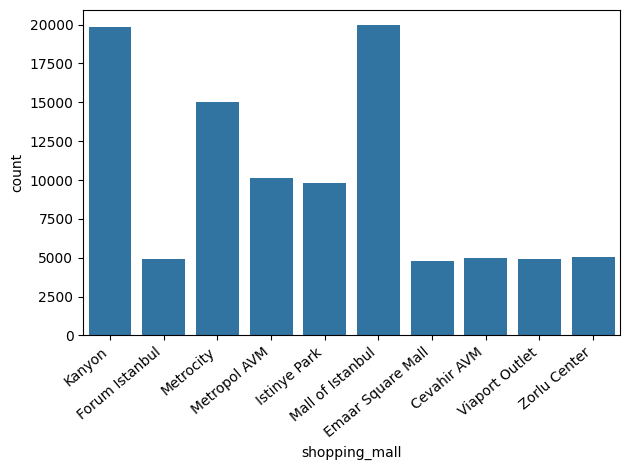

In [145]:
y=sns.countplot(data=df, x="shopping_mall")
y.set_xticklabels(y.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()




In [146]:
total_sale=df.groupby('shopping_mall')['price'].sum().reset_index()
print(total_sale)
fig = px.pie(total_sale, values="price", names="shopping_mall")
fig.show()


       shopping_mall        price
0        Cevahir AVM   3433671.84
1  Emaar Square Mall   3390408.31
2     Forum Istanbul   3336073.82
3       Istinye Park   6717077.54
4             Kanyon  13710755.24
5   Mall of Istanbul  13851737.62
6          Metrocity  10249980.07
7       Metropol AVM   6937992.99
8     Viaport Outlet   3414019.46
9       Zorlu Center   3509649.02


In [147]:

category_data = df[df['category'] == 'Clothing']
print(category_data)

      invoice_no customer_id  gender  age  category  quantity    price  \
0        I138884     C241288  Female   28  Clothing         5  1500.40   
2        I127801     C266599    Male   20  Clothing         1   300.08   
5        I227836     C657758  Female   28  Clothing         5  1500.40   
7        I293112     C176086  Female   32  Clothing         2   600.16   
8        I293455     C159642    Male   69  Clothing         3   900.24   
...          ...         ...     ...  ...       ...       ...      ...   
99435    I141871     C298790  Female   62  Clothing         3   900.24   
99436    I579905     C265057  Female   57  Clothing         5  1500.40   
99440    I887161     C137631  Female   58  Clothing         1   300.08   
99442    I105959     C131810  Female   45  Clothing         4  1200.32   
99449    I134399     C953724    Male   65  Clothing         1   300.08   

      payment_method invoice_date      shopping_mall  
0        Credit Card   05-08-2022             Kanyon  
2

<ipython-input-148-25d39b977a70>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



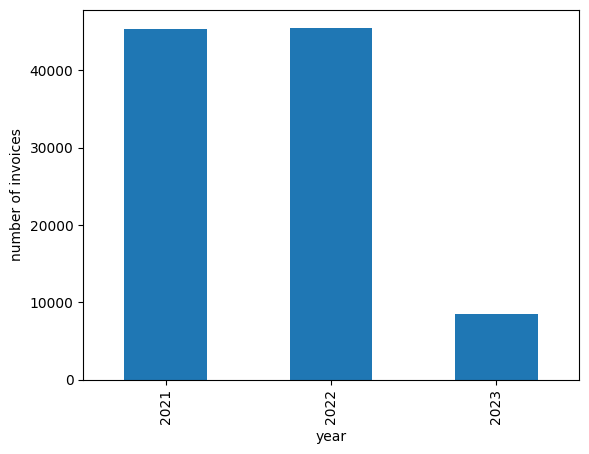

In [148]:
# prompt: plot count of invoice_date in invoice_date based on year in invoice_date

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_year'] = df['invoice_date'].dt.year

df.groupby('invoice_year')['invoice_date'].count().plot(kind='bar')
plt.xlabel("year")
plt.ylabel("number of invoices")
plt.show()


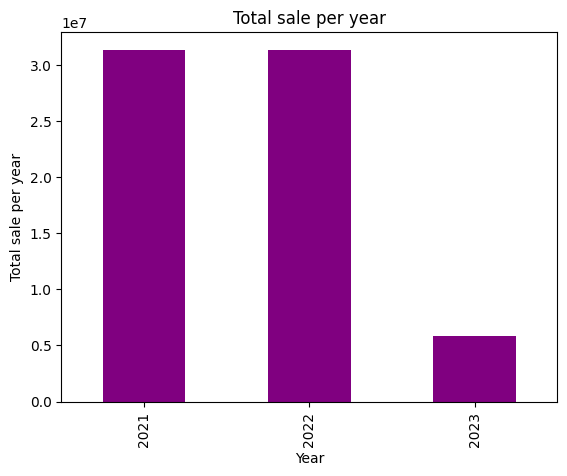

In [149]:
import pandas as pd

df['invoice_year'] = pd.to_datetime(df['invoice_date']).dt.year
grouped_data = df.groupby('invoice_year')['price'].sum()

grouped_data.plot(kind='bar',color='purple')
plt.title('Total sale per year')
plt.xlabel('Year')
plt.ylabel('Total sale per year')
plt.show()


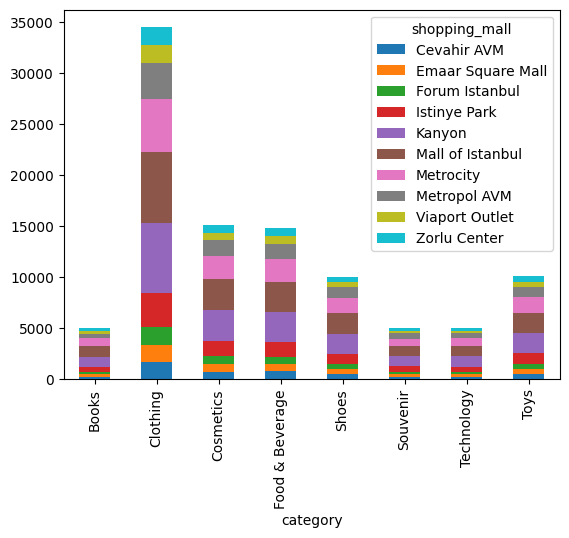

In [150]:
df.groupby(['category', 'shopping_mall']).size().unstack().plot(kind='bar', stacked=True)
plt.show()
